In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt

In [3]:
"""
Evan Hodge 800986621 HW_5 ECGR_4105
Problem 1

In our temperature prediction example, let’s change our model to a non-linear 
system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

1.a Modify the training loop properly to accommodate this redefinition. 

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1
to 0.0001 (you need four separate trainings). Report your loss for every 500 
epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the 
linear model that we did during the lecture. For this, visualize the non-linear 
model against the linear model over the input dataset, as we did during the 
lecture. Is the actual result better or worse than our baseline linear model?

"""

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u
#t_c = w2 * t_u ** 2 + w1 * t_u + b

In [4]:
"""def model(t_u, w):
    return w[2] * t_u ** 2 + w[1] * t_u + w[0]

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w = torch.tensor([0,1,1])
b = torch.zeros(())
t_p = model(t_u, w)
t_p


loss = loss_fn(t_p, t_c)
loss

delta = 0.1
loss_rate_of_change_w = \
(loss_fn(model(t_u, w + delta), t_c) -
loss_fn(model(t_u, w - delta), t_c)) / (2.0 * delta)

learning_rate = 1e-7

w = w - learning_rate * loss_rate_of_change_w
w"""

'def model(t_u, w):\n    return w[2] * t_u ** 2 + w[1] * t_u + w[0]\n\ndef loss_fn(t_p, t_c):\n    squared_diffs = (t_p - t_c)**2\n    return squared_diffs.mean()\n\nw = torch.tensor([0,1,1])\nb = torch.zeros(())\nt_p = model(t_u, w)\nt_p\n\n\nloss = loss_fn(t_p, t_c)\nloss\n\ndelta = 0.1\nloss_rate_of_change_w = (loss_fn(model(t_u, w + delta), t_c) -\nloss_fn(model(t_u, w - delta), t_c)) / (2.0 * delta)\n\nlearning_rate = 1e-7\n\nw = w - learning_rate * loss_rate_of_change_w\nw'

In [5]:
def model(t_u, *params):                           #   NON-LINEAR MODEL
    return params[0] * t_u ** 2 + params[1] * t_u + params[2]

def linmodel(t_u, *params):                        #   LINEAR MODEL FOR COMPARE
    return params[0] * t_u + params[1]

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
def lintraining_loop(n_epochs, learning_rate, params, t_u, t_c):
    print(f"Linear Model Learning Rate: {learning_rate}")
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = linmodel(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [7]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    print(f"Learning Rate: {learning_rate}")
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [8]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)


Learning Rate: 0.0001
Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

In [9]:
nlp=training_loop(
    n_epochs = 5000,
    learning_rate = 5e-4,
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Learning Rate: 0.0005
Epoch 500, Loss 5.380124
Epoch 1000, Loss 3.861909
Epoch 1500, Loss 3.570068
Epoch 2000, Loss 3.501500
Epoch 2500, Loss 3.473751
Epoch 3000, Loss 3.453630
Epoch 3500, Loss 3.435097
Epoch 4000, Loss 3.417055
Epoch 4500, Loss 3.399295
Epoch 5000, Loss 3.381780


In [10]:
training_loop(                  
    n_epochs = 5000,
    learning_rate = 1e-3,
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Learning Rate: 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [11]:
training_loop(
    n_epochs = 5000,
    learning_rate = 0.1,
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Learning Rate: 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [12]:
p = lintraining_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Linear Model Learning Rate: 0.01
Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = linmodel(t_un, *p)
nlt_p = model(t_un, *nlp)

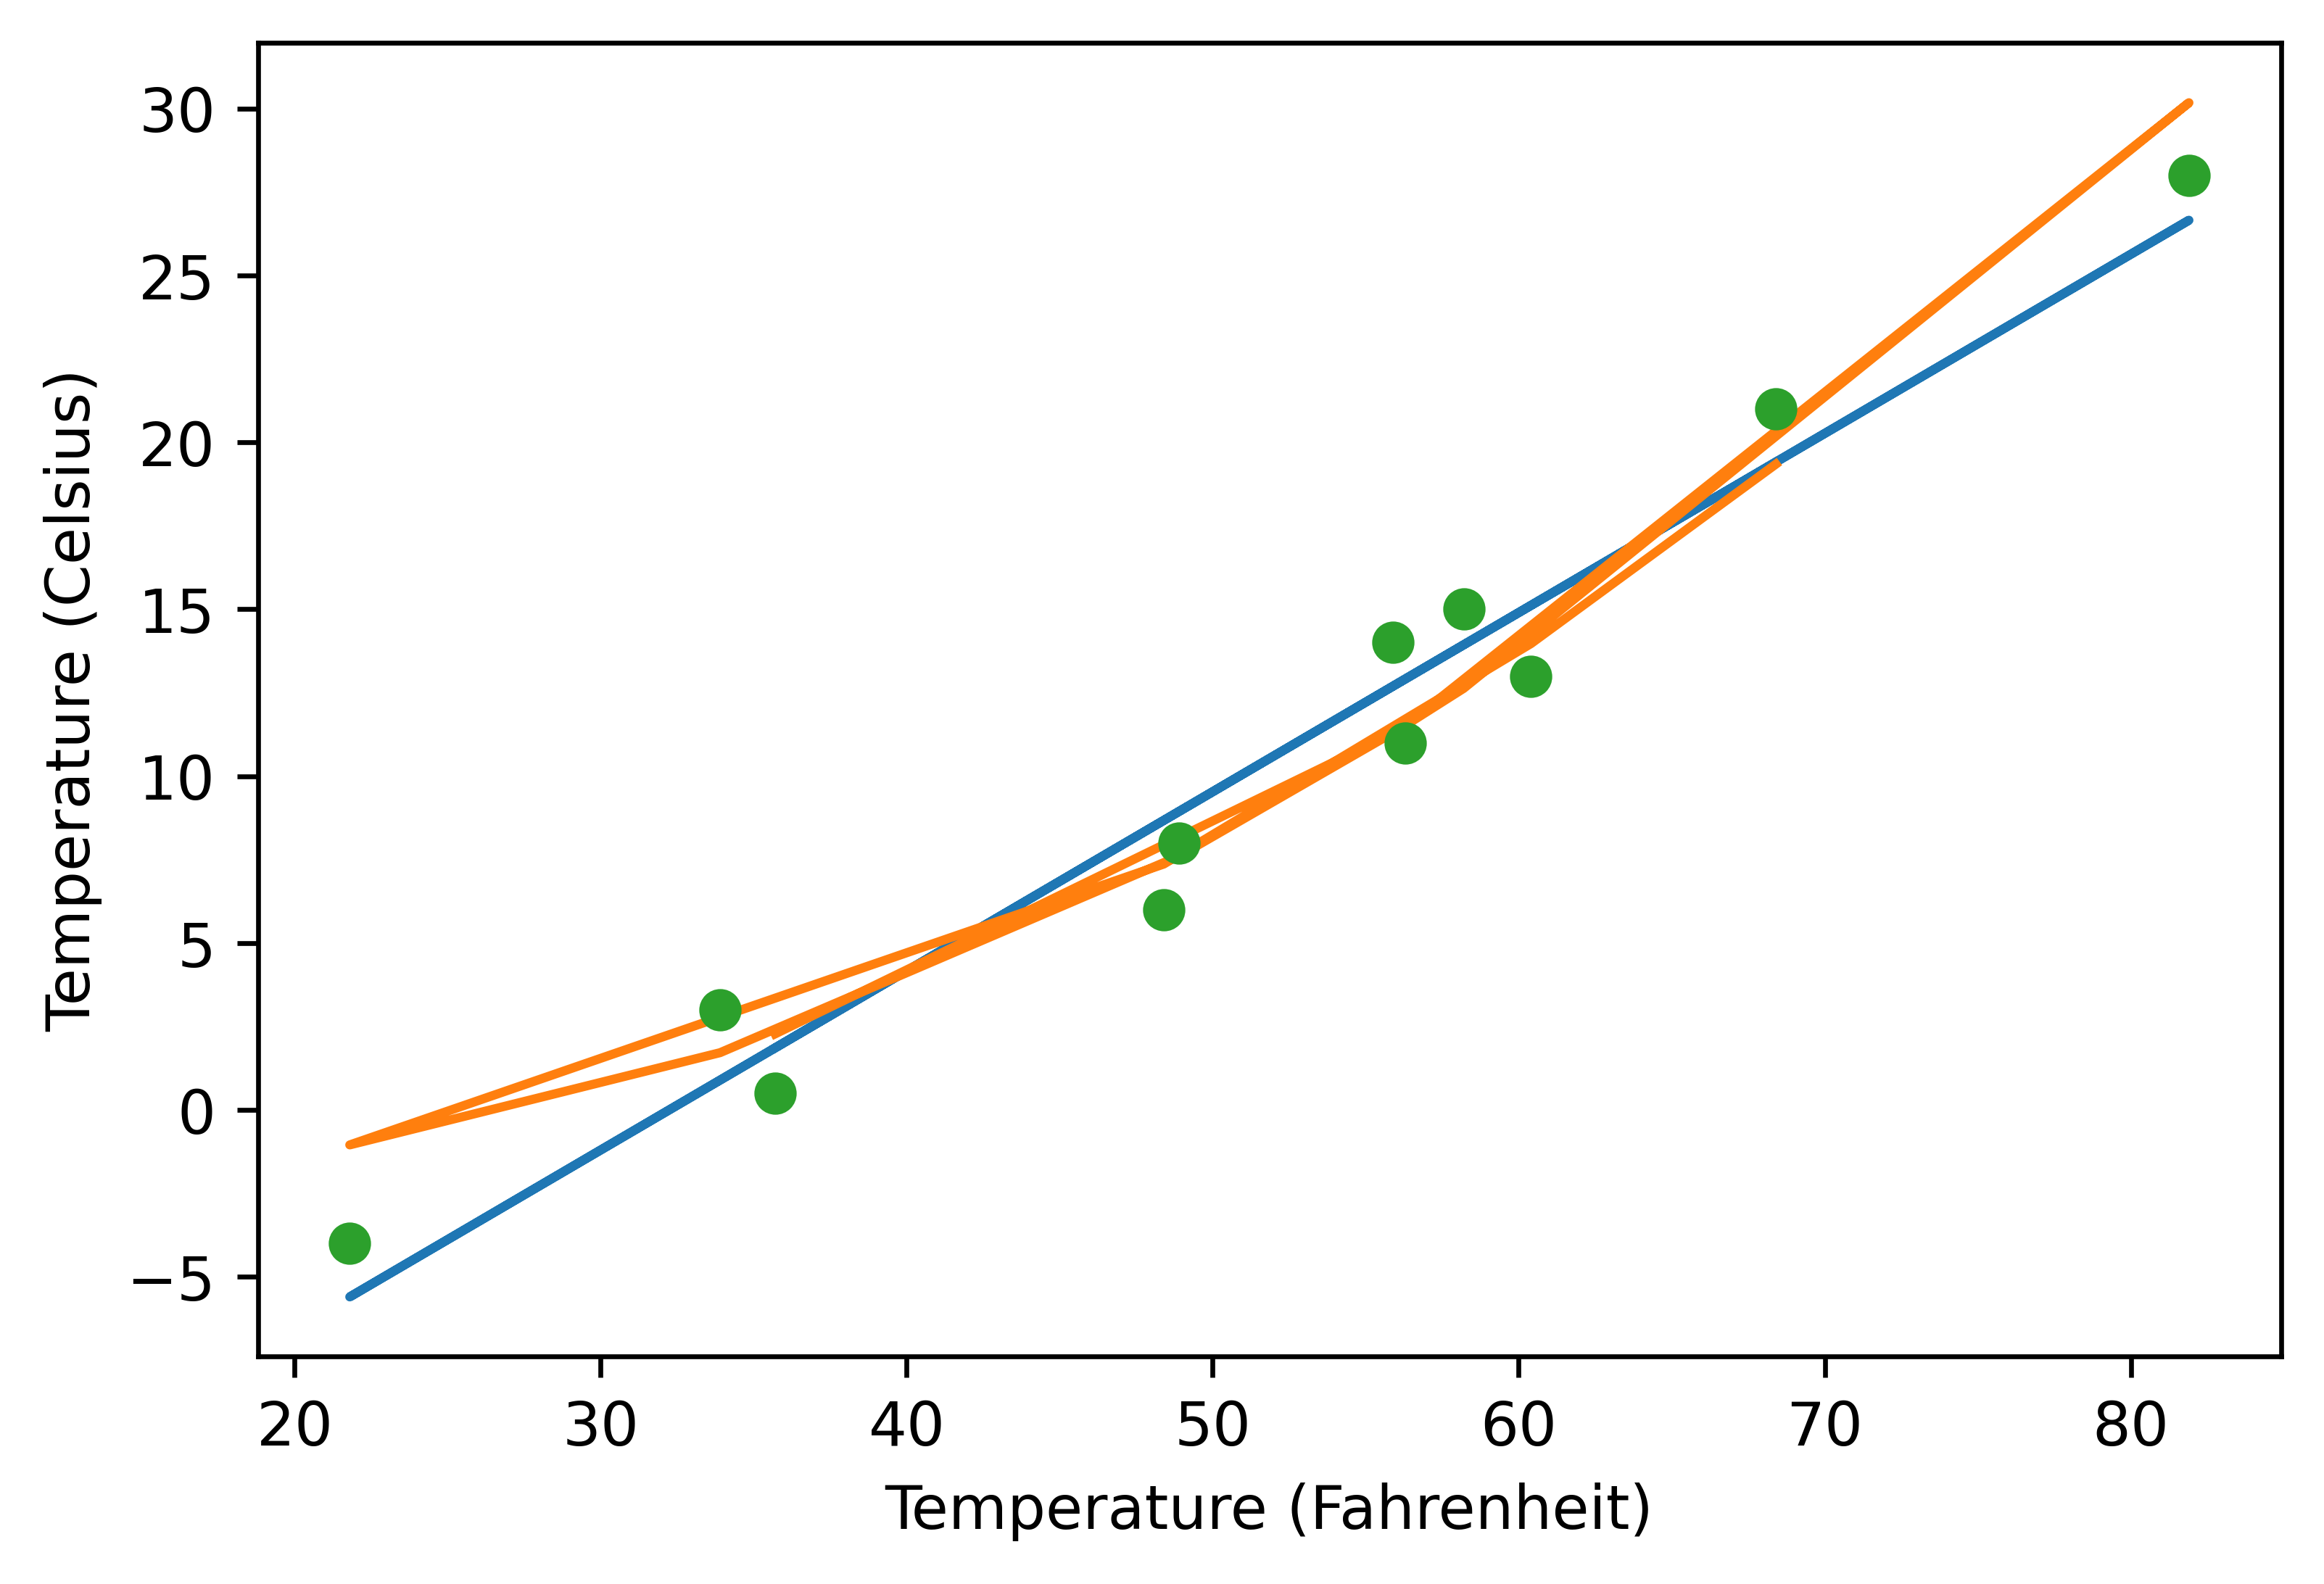

In [14]:
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), nlt_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [15]:
"""
Problem 2

2.a. Develop preprocessing and a training loop to train a linear regression 
model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation 
use 80% (training) and 20% (validation) split. Identify the best parameters 
for your linear regression model, based on the above input variables. In 
this case, you will have six parameters:

U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B

2.b Use 5000 epochs for your training. Explore different learning rates from 
0.1 to 0.0001 (you need four separate trainings). Report your loss and 
validation accuracy for every 500 epochs per each training. Pick the best 
linear model.
"""
import pandas as pd 
import numpy as np 
import torch.optim as optim
HS = pd.read_csv('Housing.csv')
HS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
#HS = pd.DataFrame(HS)

In [17]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price'] # define binary attributes
HS = HS[num_vars]

X = HS.loc[:, HS.columns != 'price']
Y = HS.iloc[:,-1:]

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = pd.DataFrame(sc_X.fit_transform(X))
Y = pd.DataFrame(sc_X.fit_transform(Y))

X = np.array(X)
Y = np.array(Y)

t_u = torch.tensor(X, dtype=torch.float32)
t_c = torch.tensor(Y, dtype=torch.float32)

In [18]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [19]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [20]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u
b = torch.zeros(())

In [21]:
def model(t_u, *params):                        #   LINEAR MODEL 
    return params[0] * t_u + params[1] * t_u + params[2] * t_u + params[3] * t_u +params[4] * t_u + params[5]             # U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B
    #print(params)
    #return params * t_u + b
    
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        tloss[epoch-1] = train_loss
        vloss[epoch-1] = val_loss
        
        if epoch <=3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
           
    return params, tloss, vloss

tloss = torch.ones((5000))
vloss = torch.ones((5000))

Epoch 1, training loss 0.0442, Validation loss 0.0473
Epoch 2, training loss 0.0442, Validation loss 0.0473
Epoch 3, training loss 0.0442, Validation loss 0.0473
Epoch 500, training loss 0.0438, Validation loss 0.0469
Epoch 1000, training loss 0.0434, Validation loss 0.0465
Epoch 1500, training loss 0.0431, Validation loss 0.0462
Epoch 2000, training loss 0.0427, Validation loss 0.0458
Epoch 2500, training loss 0.0424, Validation loss 0.0455
Epoch 3000, training loss 0.0420, Validation loss 0.0451
Epoch 3500, training loss 0.0417, Validation loss 0.0448
Epoch 4000, training loss 0.0414, Validation loss 0.0445
Epoch 4500, training loss 0.0410, Validation loss 0.0441
Epoch 5000, training loss 0.0407, Validation loss 0.0438


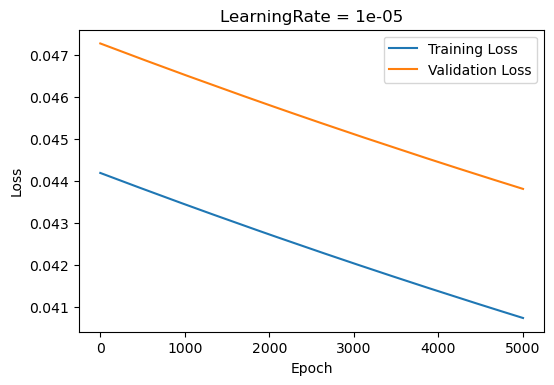

In [22]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

a = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

figa = plt.figure(dpi=100)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 5000 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 5000 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()

Epoch 1, training loss 0.0442, Validation loss 0.0473
Epoch 2, training loss 0.0442, Validation loss 0.0473
Epoch 3, training loss 0.0442, Validation loss 0.0473
Epoch 500, training loss 0.0407, Validation loss 0.0438
Epoch 1000, training loss 0.0379, Validation loss 0.0410
Epoch 1500, training loss 0.0356, Validation loss 0.0386
Epoch 2000, training loss 0.0337, Validation loss 0.0367
Epoch 2500, training loss 0.0321, Validation loss 0.0352
Epoch 3000, training loss 0.0308, Validation loss 0.0339
Epoch 3500, training loss 0.0298, Validation loss 0.0328
Epoch 4000, training loss 0.0289, Validation loss 0.0320
Epoch 4500, training loss 0.0282, Validation loss 0.0313
Epoch 5000, training loss 0.0277, Validation loss 0.0307


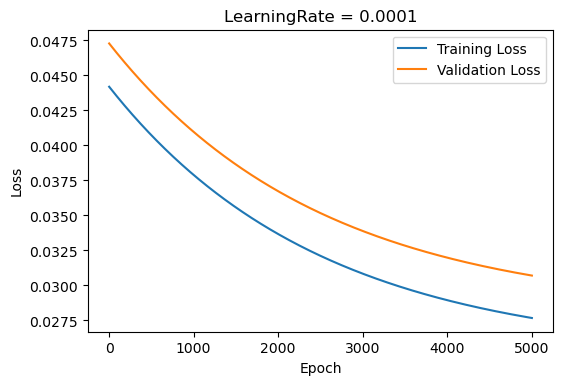

In [23]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

b = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

figb = plt.figure(dpi=100)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 5000 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 5000 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()

Epoch 1, training loss 0.0442, Validation loss 0.0473
Epoch 2, training loss 0.0441, Validation loss 0.0472
Epoch 3, training loss 0.0440, Validation loss 0.0471
Epoch 500, training loss 0.0277, Validation loss 0.0307
Epoch 1000, training loss 0.0254, Validation loss 0.0284
Epoch 1500, training loss 0.0251, Validation loss 0.0281
Epoch 2000, training loss 0.0251, Validation loss 0.0281
Epoch 2500, training loss 0.0250, Validation loss 0.0280
Epoch 3000, training loss 0.0250, Validation loss 0.0280
Epoch 3500, training loss 0.0250, Validation loss 0.0280
Epoch 4000, training loss 0.0250, Validation loss 0.0280
Epoch 4500, training loss 0.0250, Validation loss 0.0279
Epoch 5000, training loss 0.0249, Validation loss 0.0279


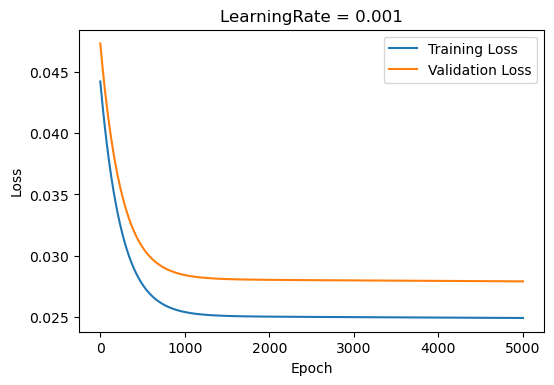

In [24]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

c = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

figc = plt.figure(dpi=100)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 5000 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 5000 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()

Epoch 1, training loss 0.0442, Validation loss 0.0473
Epoch 2, training loss 0.0434, Validation loss 0.0465
Epoch 3, training loss 0.0427, Validation loss 0.0458
Epoch 500, training loss 0.0249, Validation loss 0.0279
Epoch 1000, training loss 0.0248, Validation loss 0.0277
Epoch 1500, training loss 0.0246, Validation loss 0.0276
Epoch 2000, training loss 0.0245, Validation loss 0.0274
Epoch 2500, training loss 0.0243, Validation loss 0.0273
Epoch 3000, training loss 0.0242, Validation loss 0.0271
Epoch 3500, training loss 0.0241, Validation loss 0.0270
Epoch 4000, training loss 0.0240, Validation loss 0.0268
Epoch 4500, training loss 0.0238, Validation loss 0.0267
Epoch 5000, training loss 0.0237, Validation loss 0.0266


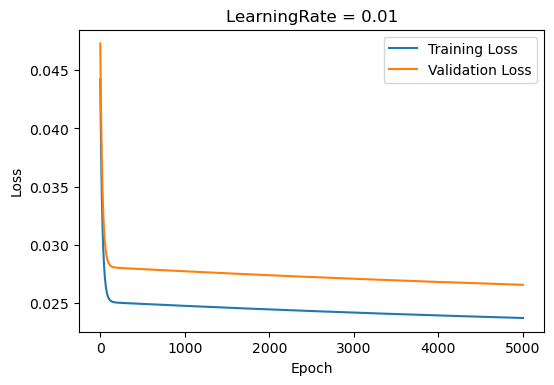

In [25]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

d = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

figd = plt.figure(dpi=100)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 5000 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 5000 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()

In [26]:
"""
3.a Build a fully connected neural network for the housing dataset you did in previous problem. For training 
and validation use 80% (training) and 20% (validation) split. For this part, only use one hidden layer with 
8 nodes. Train your network for 200 epochs. Report your training time, training loss, and evaluation 
accuracy after 200 epochs.  (15pts)

3.b Extend your network with two more additional hidden layers, like the example we did in lecture. Train 
your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 
epochs. Analyze your results in your report and compare your model size and 
accuracy over the baseline implementation in Problem1a. Do you see any over-fitting?  (25pts)
"""
import torch.nn as nn
from collections import OrderedDict

In [27]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))]))
#seq_model = nn.Sequential(
#    nn.Linear(5, 8),
#    nn.Tanh(),
#    nn.Linear(8, 1))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [28]:
[param.shape for param in seq_model.parameters()]

[torch.Size([8, 5]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [29]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 5])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [30]:
learning_rate=1e-3

optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

tloss = torch.ones((200))
vloss = torch.ones((200))

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        
        t_p_train = model(t_u_train)
        train_loss = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        val_loss = loss_fn(t_p_val, t_c_val)

        tloss[epoch-1] = train_loss
        vloss[epoch-1] = val_loss
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch ==1 or epoch % 200 == 0:
            print(f"Epoch {epoch}, training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")

In [31]:
training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model =  seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un,
    t_u_val = val_t_un,
    t_c_train = train_t_c,
    t_c_val = val_t_c)
#print('output', seq_model(val_t_un))
#print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)
    

Epoch 1, training loss 0.2439, Validation loss 0.2545
Epoch 200, training loss 0.0728, Validation loss 0.0787
hidden tensor([[ 0.0042,  0.0061,  0.0023,  0.0050,  0.0044],
        [ 0.0040,  0.0058,  0.0022,  0.0048,  0.0042],
        [ 0.0040,  0.0057,  0.0021,  0.0047,  0.0042],
        [ 0.0015,  0.0021,  0.0008,  0.0017,  0.0015],
        [-0.0004, -0.0005, -0.0002, -0.0004, -0.0004],
        [-0.0038, -0.0055, -0.0021, -0.0045, -0.0040],
        [ 0.0039,  0.0057,  0.0021,  0.0046,  0.0041],
        [-0.0007, -0.0011, -0.0004, -0.0009, -0.0008]])


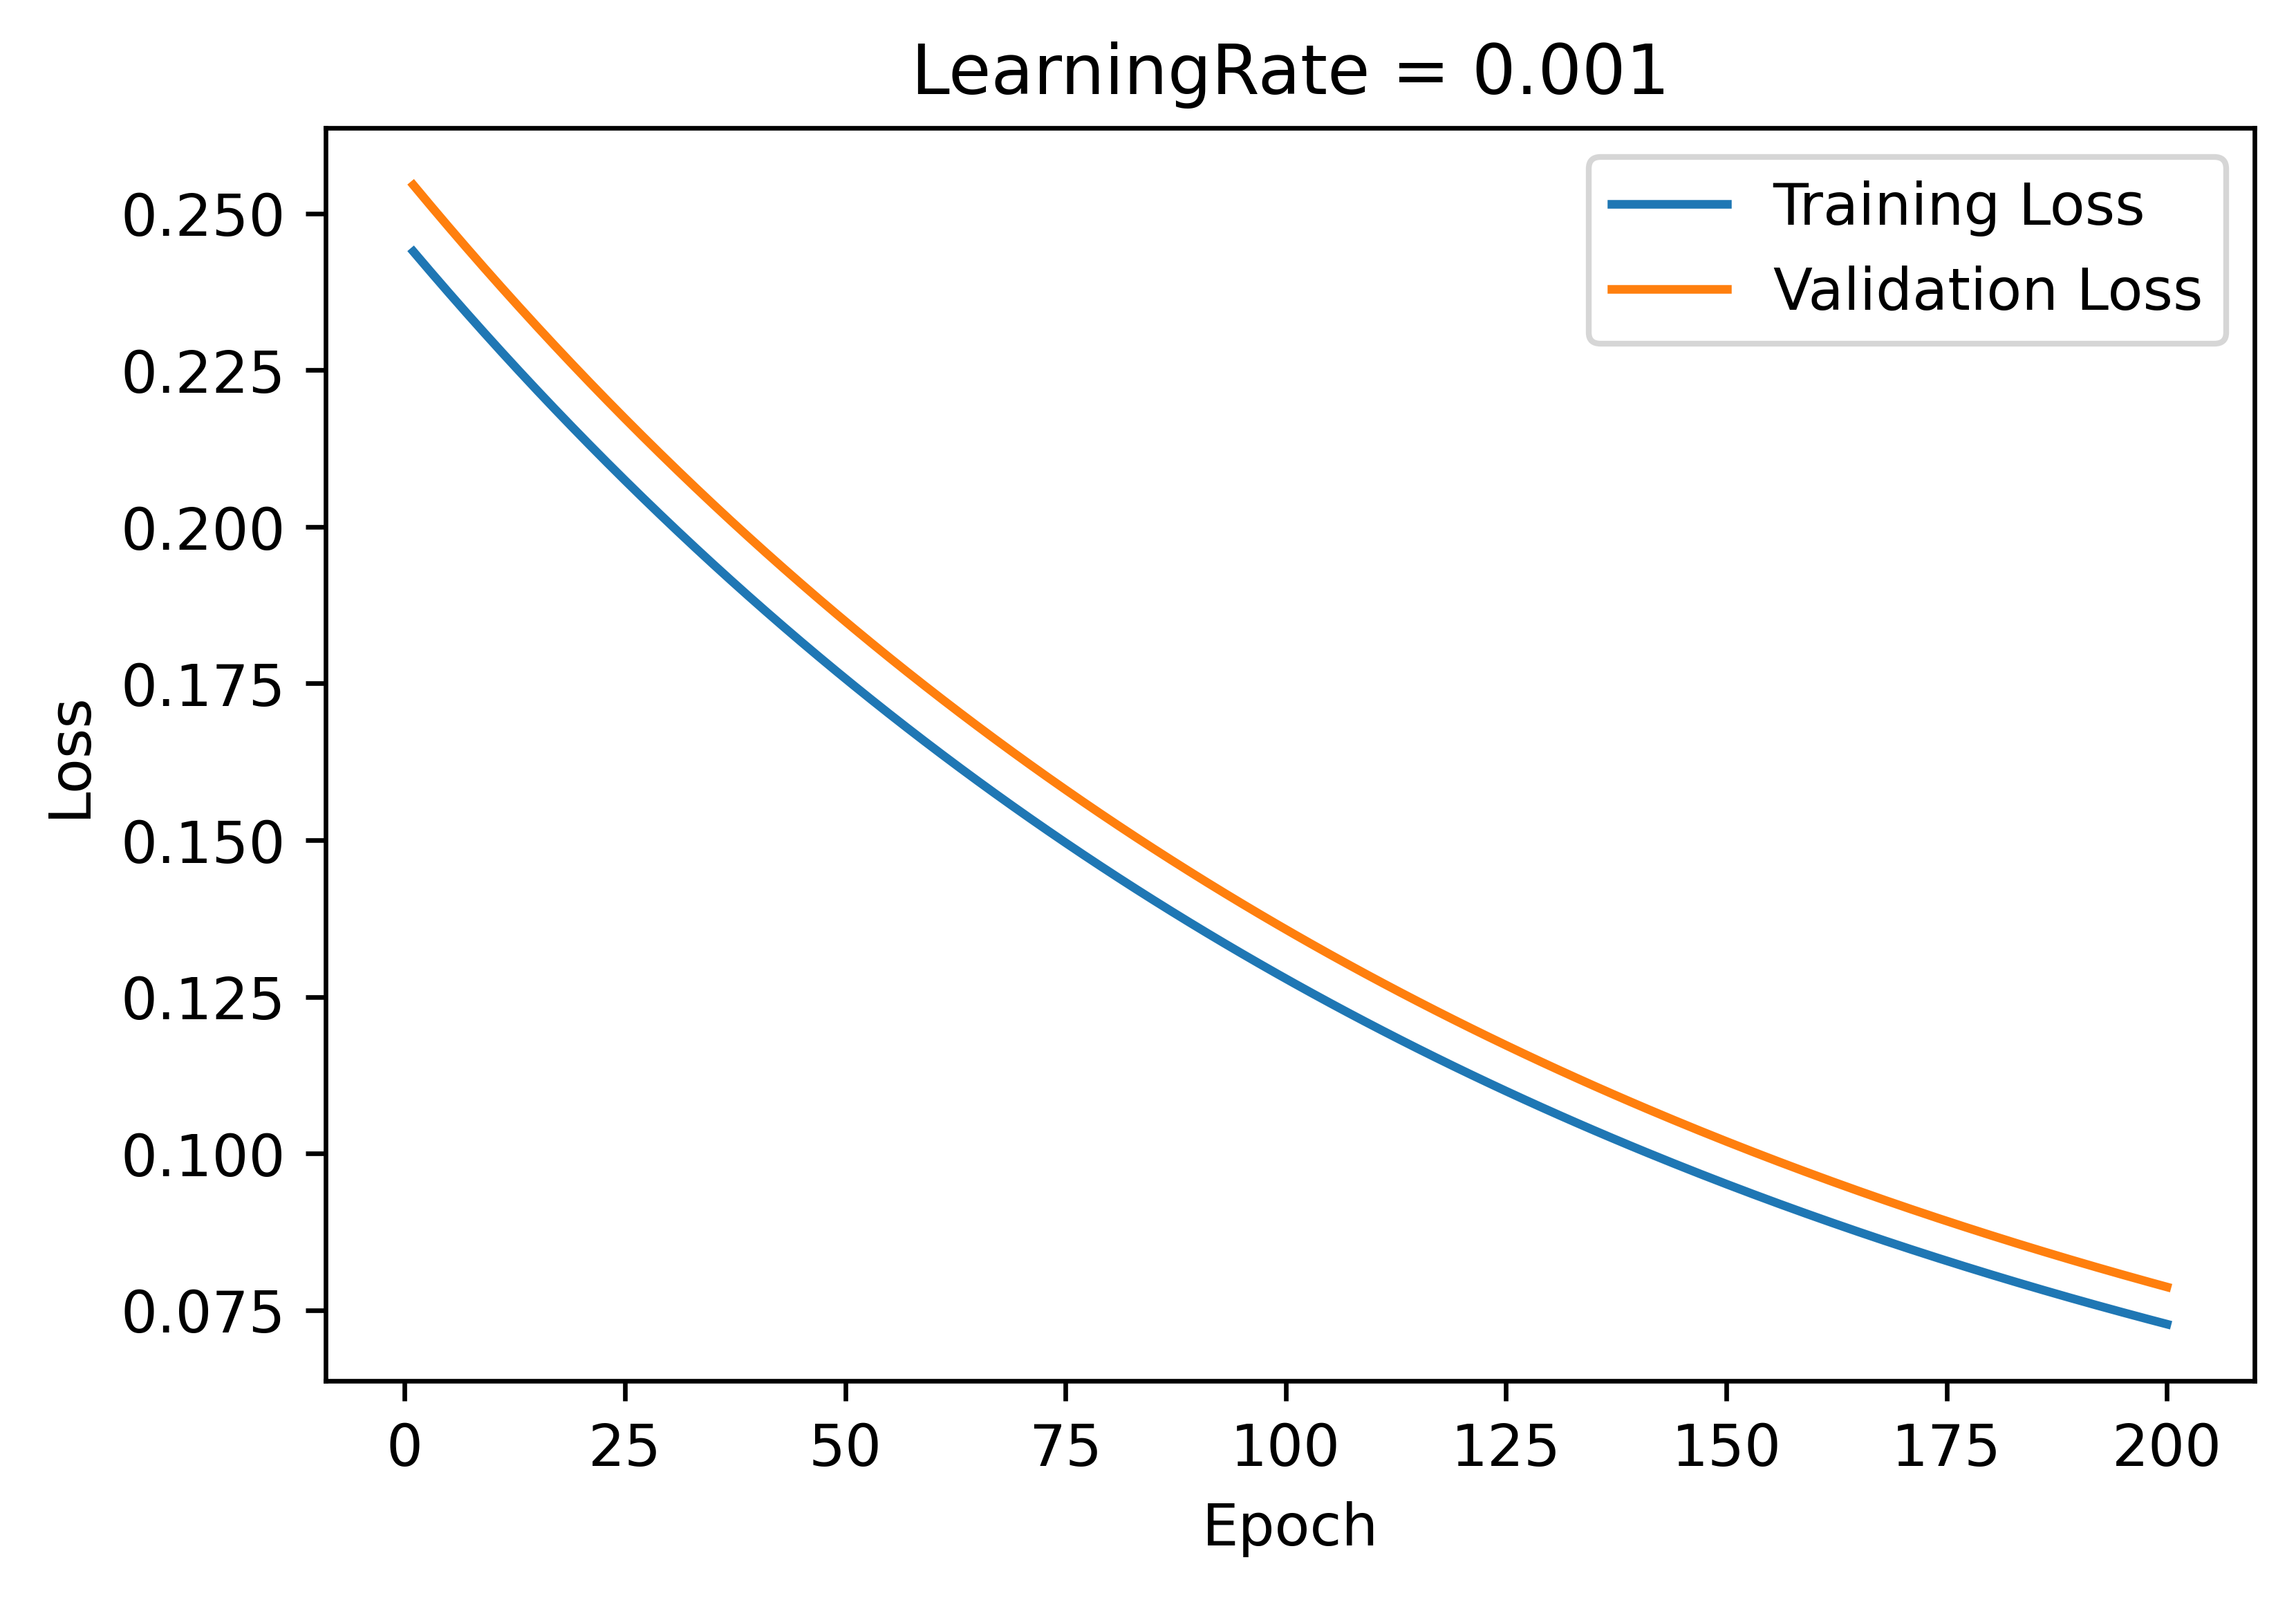

In [32]:
n_epochs = 200

fig= plt.figure(dpi=600)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 200 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 200 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()

In [33]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear_a', nn.Linear(5, 6)),
    ('hidden_activation_a', nn.Tanh()),
    ('hidden_linear_b', nn.Linear(6, 8)),
    ('hidden_activation_b', nn.Tanh()),
    ('hidden_linear_c', nn.Linear(8, 4)),
    ('hidden_activation_c', nn.Tanh()),
    ('output_linear', nn.Linear(4, 1))]))
#seq_model = nn.Sequential(
 #   nn.Linear(5, 6),
  #  nn.Tanh(),
   # nn.Linear(6, 8),
    #nn.Tanh(),
#    nn.Linear(8, 4),
 #   nn.Tanh(),
  #  nn.Linear(4, 1))
seq_model

Sequential(
  (hidden_linear_a): Linear(in_features=5, out_features=6, bias=True)
  (hidden_activation_a): Tanh()
  (hidden_linear_b): Linear(in_features=6, out_features=8, bias=True)
  (hidden_activation_b): Tanh()
  (hidden_linear_c): Linear(in_features=8, out_features=4, bias=True)
  (hidden_activation_c): Tanh()
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [34]:
learning_rate=1e-3

optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

tloss = torch.ones((200))
vloss = torch.ones((200))

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        
        t_p_train = model(t_u_train)
        train_loss = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        val_loss = loss_fn(t_p_val, t_c_val)

        tloss[epoch-1] = train_loss
        vloss[epoch-1] = val_loss
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch ==1 or epoch % 200 == 0:
            print(f"Epoch {epoch}, training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")

In [35]:
training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model =  seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un,
    t_u_val = val_t_un,
    t_c_train = train_t_c,
    t_c_val = val_t_c)
#print('output', seq_model(val_t_un))
#print('answer', val_t_c)
#print('hidden', seq_model.hidden_linear_b.weight.grad)

Epoch 1, training loss 0.1130, Validation loss 0.1197
Epoch 200, training loss 0.0445, Validation loss 0.0487


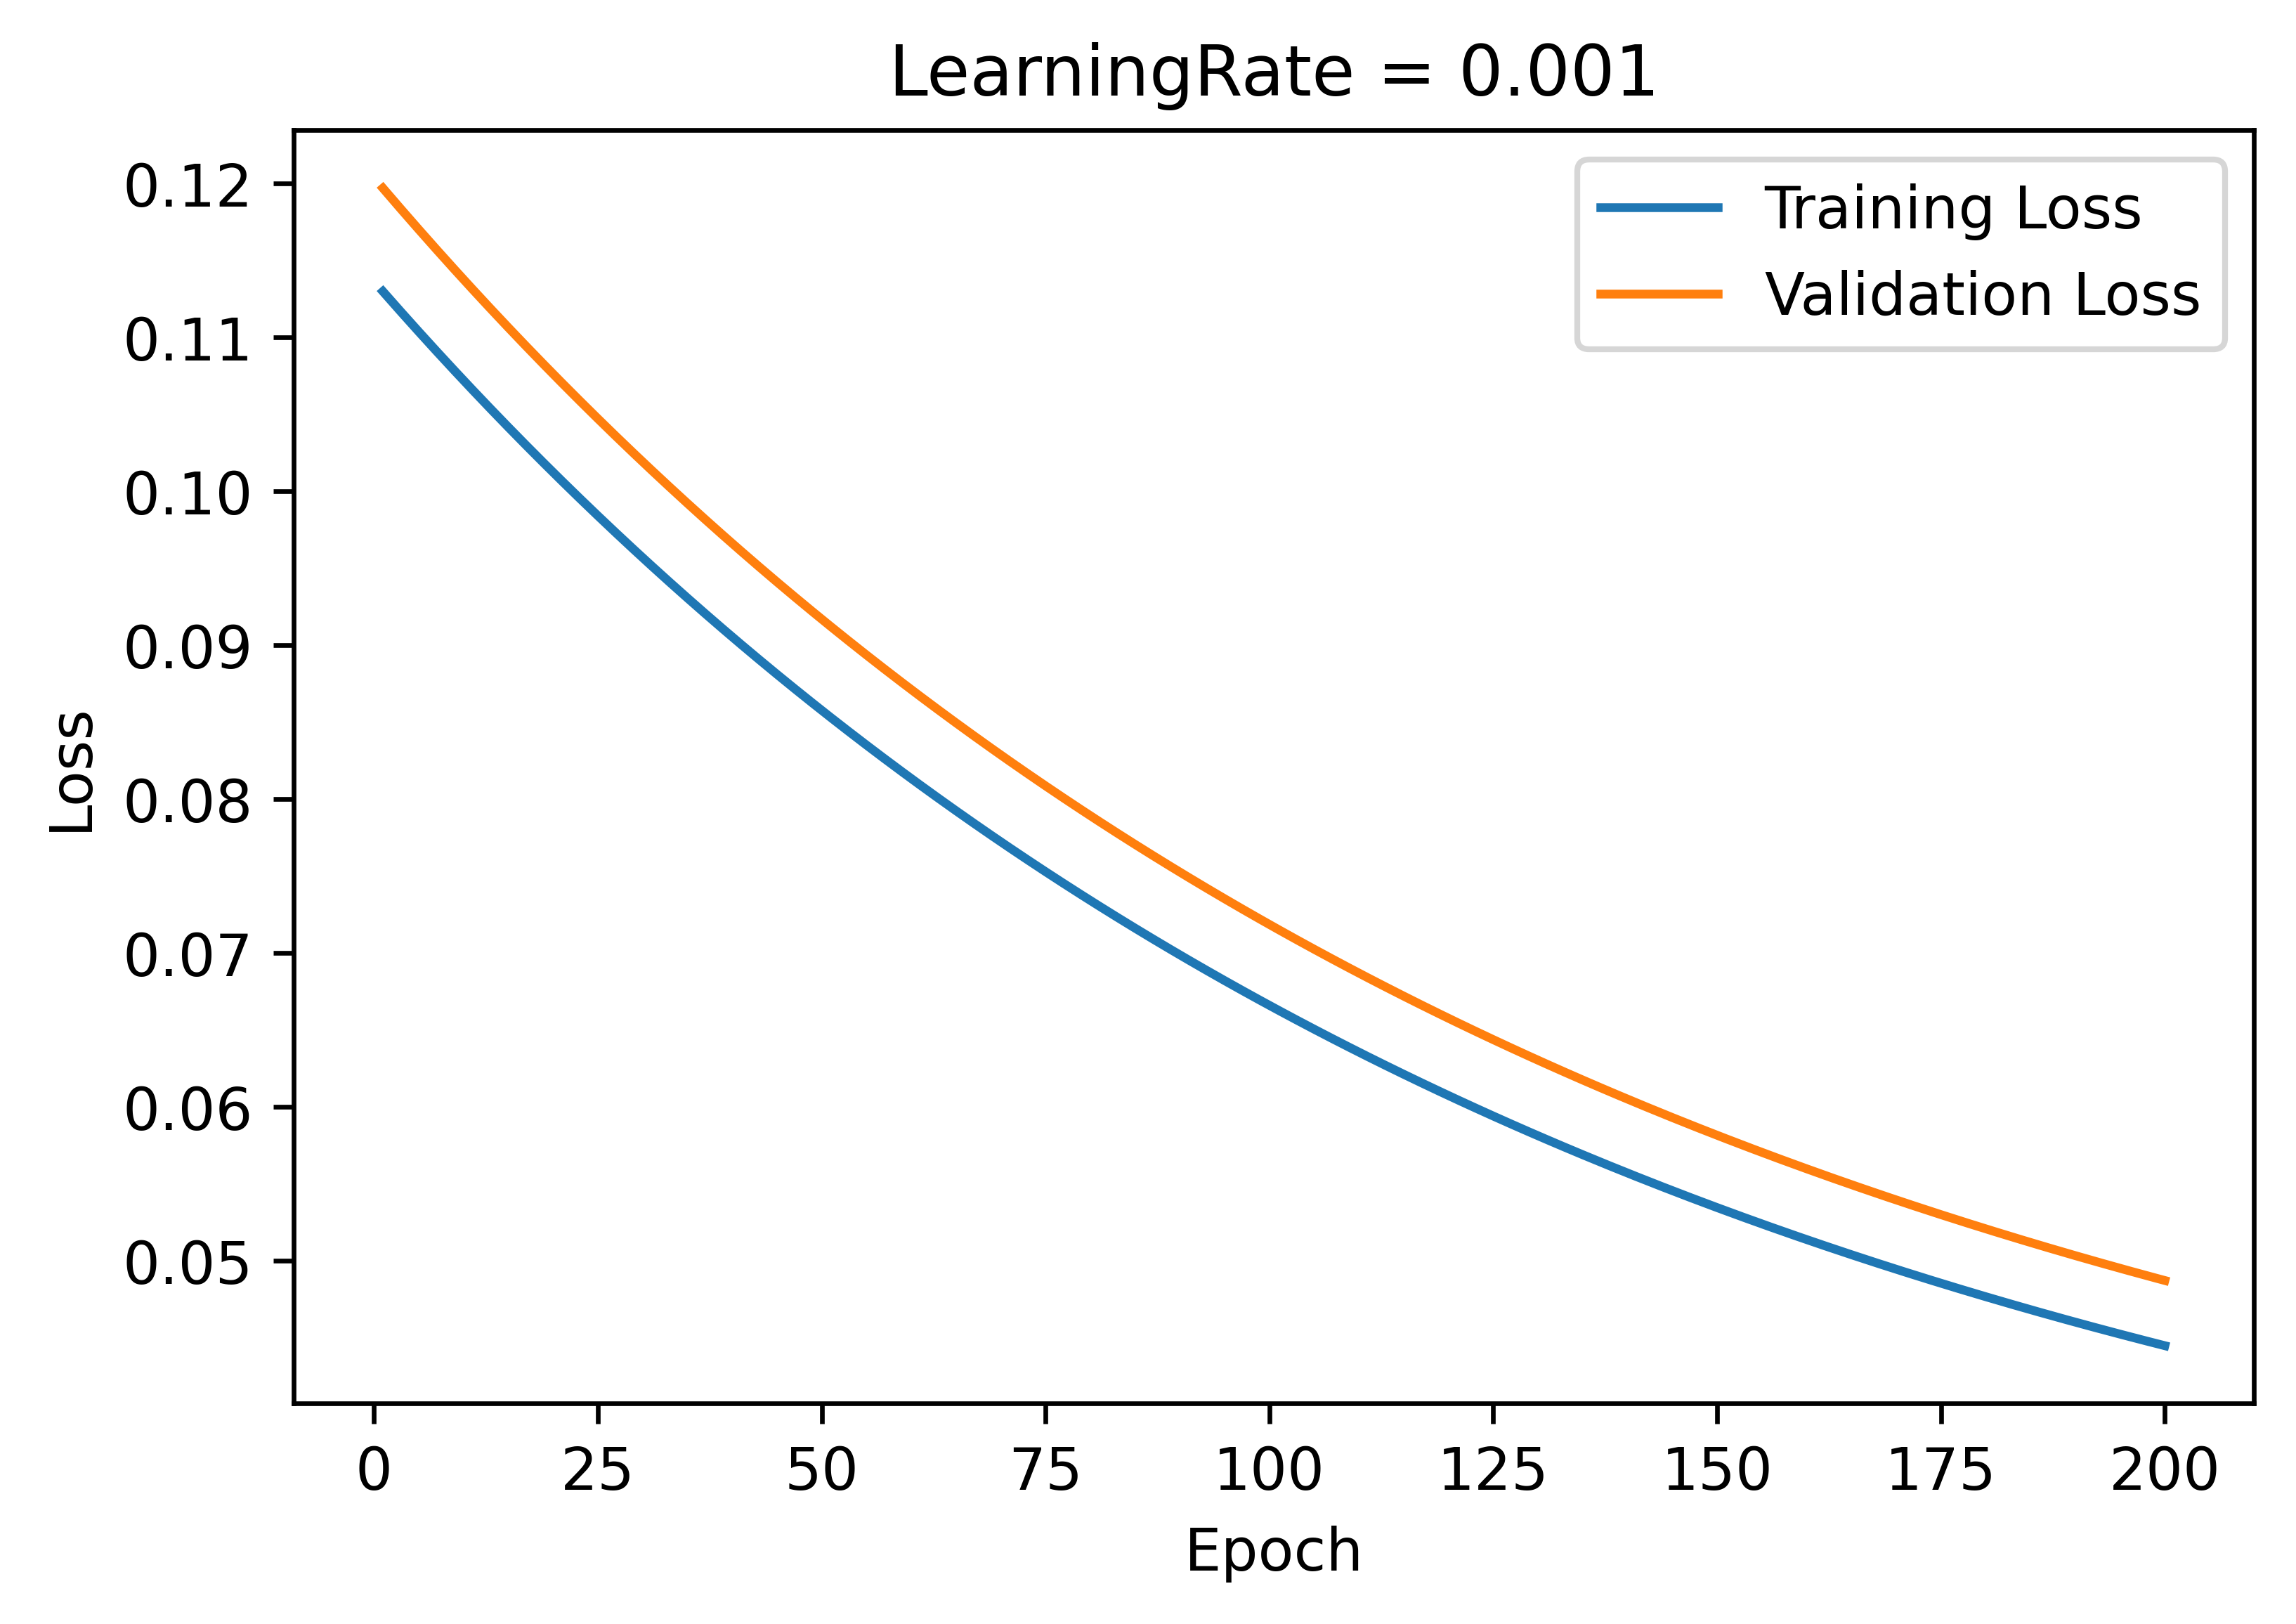

In [36]:
fig= plt.figure(dpi=600)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"LearningRate = {learning_rate}")
plt.plot(range(1, 200 + 1), tloss.detach().numpy(),label='Training Loss')
plt.plot(range(1, 200 + 1), vloss.detach().numpy(),label='Validation Loss')
plt.legend()